* Encoding : Değişkenlerin temsil şekillerinin değiştirilmesi. 
* Label Encoding :  Bir kategorik değişkenin sınıfları encode etmek yani yeniden kodlamak. Mesela (evet, hayır),(erkek,kadın),(sigara içen, sigara içmeyen) gibi kategorik sınıfları (0-1) (0-1-2-3) nümerik şekilde temsil etmek.
* Sıralı(ordinal) değişkenler sayısal olarak da temsil edilebilir.
* Nominal değişkenleri sayısal olarak temsil etmek sorun yaratabilir. Değişkenler arasında bir büyüklük küçüklük temsil edilmediği halde nümerik sınıflandırma yapılarak böyle bir temsillik sağlanılır. Bu da bize zorluk çıkarır. Bu tarz verilerde one hot encoding uygulanabilir.

# Label Encoding & Binary Encoding


In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [3]:
def load():
  data = pd.read_csv("titanic.csv")
  return data

df = load()

In [4]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [5]:
le = LabelEncoder()

In [7]:
#Fittransform iki basamaklı bir işlemdir. İlk basamağında ilgili dönüştürme işlemi yapılır. İkinci basamağında da elinde bulunan ilk ve son halindeki verileri son haline dönüştürür .
#Alfabetik sıraya göre ilk gördüğü değere 0 değerini verir. Alfabetik sırada female maleye göre önce geliyor. Female=0,male=1
le.fit_transform(df["Sex"])[0:5]

array([1, 0, 0, 0, 1])

In [8]:
# 0 ın hangi sınıf, 1in hangi sınıf olduğunu hatırlamak amacıyla :
le.inverse_transform([0,1]) #0 ve 1 değerinin karşılığını bu fonksiyonla sorgulayabiliriz.

array(['female', 'male'], dtype=object)

In [9]:
#Yaptığımız işlemleri tekrardan tek tek uğraşmamak için fonksiyonlaştıralım :
def label_encoder(dataframe, binary_col):
  labelencoder=LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [12]:
#Elimizde yüzlerce değişken olduğunda ne yapmalıyız ?
#İki sınıflı kategorik değişkenleri bulabilirsek ve label encoder dan geçirirsek problem çözülür gibi.
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2] #Eğer burada unique methodu kullanıp lenini alırsak eksik değerleri de sınıf olarak göreceğinden hatalı işlem yaparız. 
# Bu yüzden ilgili değişkenin numberunique sayısı 2yse diye işlem yaptık.
binary_cols

['Sex']

In [14]:
for col in binary_cols:
  label_encoder(df, col) 

df #cinsiyet değişkeninin 0-1 lerle değiştirildiğini görebiliriz.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [20]:
#Bu işlemi daha büyük bir data için deneyelim.
def load_application_train():
  data = pd.read_csv("application_train.csv")
  return data
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2] 
binary_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [22]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [23]:
for col in binary_cols:
  label_encoder(df, col) 

In [24]:
#Eksik değerlerin de doldurulmuş olduğunu gördük. Yani kısaca boş değerlerin de farkında olmalıyız!!!
#unique eksik değerleri de göz önünde bulundururken, nunique eksik değerleri göz önünde bulundurmaz.
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


# ONE HOT ENCODING

In [25]:
#Dummy değişken tuzağından, drop first kullanarak ilk sınıfı drop eder ve bu şekilde kurtulabiliriz.
# Dummy Değişken Nedir ? -> https://ofislab.info/spss-ile-veri-analizi-ve-istatistik-konulari/kukla-degiskenler-dummy-variables/

In [26]:
df = load()

In [27]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
#Sınıflar arası farklılık olmadığından label encoder a sokmak sınıflar arası fark yaratabilir.
#Bundan dolayı one hot encoding kullanacağız.
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


**get_dummies**->  Kategorik verileri kukla veya gösterge değişkenlerine 
dönüştürür. https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

In [30]:
#Değişkenler birbiri üzerinden üretilebilir olmasın diye düşünerek drop_first argumanını true yapacağız.
#İlk sınıfı alfabetik sıraya göre seçti.
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


In [32]:
#Eksik değerler için de bir sınıf oluşturmak istersek :
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [35]:
#Label encoding uygulamaya gerek kalmadan binary encode etmek istersek, yani sex_male adında oluşan kolona bakıldığında erkek mi sorusuna 1-0 lar ile cevap verildiğinden binary e dönüştürülmüş oldu.
pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True).head() #Bunu uygulamışken embarked değişkeni için de uygulamış olduk.

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [37]:
#Bütün bunlar için bir fonksiyon yazmamız gerekirse:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  return dataframe

In [41]:
df = load()

In [42]:
def grab_col_names(dataframe, cat_th=10, car_th=20): #essiz deger sayisi 10dan kucukse kategorik degisken, 20 den buyukse de kardinal degisken gibi dusunucez. 
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int","float"]]
  
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

  cat_cols = num_but_cat + cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int","float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"Categorical Columns: {len(cat_cols)}")
  print(f"Numerical Columns: {len(num_cols)}")
  print(f"Categoric but Cardinal: {len(cat_but_car)}")
  print(f"Numeric but Categoric: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [40]:
#cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
Categorical Columns: 6
Numerical Columns: 3
Categoric but Cardinal: 3
Numeric but Categoric: 4


In [47]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2] #İlgili değişkenin eşsiz değer sayısı 2den büyük ve 10dan küçükse bunları seç. Yani one hot encoder uygulanacak kolonları seçiyoruz.

In [48]:
ohe_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [49]:
one_hot_encoder(df,ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


# RARE ENCODING

In [50]:
#BONUS
#1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
#2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
#3. Rare encoder yazılacak.

**1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.**


In [81]:
df = load_application_train()
df["NAME_EDUCATION_TYPE"].value_counts() #Academic degree nin frekansının düşük olduğunu görüyoruz.

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [82]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
Categorical Columns: 54
Numerical Columns: 67
Categoric but Cardinal: 1
Numeric but Categoric: 39


In [83]:
cat_cols

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 

In [84]:
def cat_sum_plot(dataframe, col_name, plot = False):
   print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
   print("#######################################")
   if plot:
      sns.countplot(x=dataframe[col_name], data = dataframe)
      plt.show()
   
for col in cat_cols:
  cat_sum_plot(df, col)
#Sınıf frekansı çok düşük olanları veri setinden çıkarbilmeyi düşünebiliriz.

   TARGET      Ratio
0  282686  91.927118
1   24825   8.072882
#######################################
   FLAG_MOBIL      Ratio
1      307510  99.999675
0           1   0.000325
#######################################
   FLAG_EMP_PHONE      Ratio
1          252125  81.988937
0           55386  18.011063
#######################################
   FLAG_WORK_PHONE      Ratio
0           246203  80.063152
1            61308  19.936848
#######################################
   FLAG_CONT_MOBILE     Ratio
1            306937  99.81334
0               574   0.18666
#######################################
   FLAG_PHONE      Ratio
0      221080  71.893363
1       86431  28.106637
#######################################
   FLAG_EMAIL      Ratio
0      290069  94.328008
1       17442   5.671992
#######################################
   REGION_RATING_CLIENT      Ratio
2                226984  73.813294
3                 48330  15.716511
1                 32197  10.470195
#########################

**2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.**


In [85]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [86]:
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean() #Name_income_type sınıfına göre target değişkeninin ortalamasını aldık.
#1e yakın olma durumunda krediyi ödeyememeyi ifade etmektedir. 0a yakın olma durumunda da ödeyebilmeyi ifade etmektedir.

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

In [87]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col,":", len(dataframe[col].value_counts()))#ilgili kategorik değişkenin kaç sınıfı olduğu bilgisi.
    print(pd.DataFrame({"COUNT":dataframe[col].value_counts(),#sınıf frekansları
                        "RATIO":dataframe[col].value_counts()/len(dataframe),#sınıf oranları
                        "TARGET_MEAN":dataframe.groupby(col)[target].mean()}), end="\n\n\n") #target yani bağımlı değişkene göre groupby işlemi.

              

In [92]:
rare_analyser(df,"TARGET",cat_cols)

TARGET : 2
    COUNT     RATIO  TARGET_MEAN
0  282686  0.919271          0.0
1   24825  0.080729          1.0


FLAG_MOBIL : 2
    COUNT     RATIO  TARGET_MEAN
0       1  0.000003     0.000000
1  307510  0.999997     0.080729


FLAG_EMP_PHONE : 2
    COUNT     RATIO  TARGET_MEAN
0   55386  0.180111     0.054003
1  252125  0.819889     0.086600


FLAG_WORK_PHONE : 2
    COUNT     RATIO  TARGET_MEAN
0  246203  0.800632     0.076851
1   61308  0.199368     0.096301


FLAG_CONT_MOBILE : 2
    COUNT     RATIO  TARGET_MEAN
0     574  0.001867     0.078397
1  306937  0.998133     0.080733


FLAG_PHONE : 2
    COUNT     RATIO  TARGET_MEAN
0  221080  0.718934     0.084784
1   86431  0.281066     0.070357


FLAG_EMAIL : 2
    COUNT    RATIO  TARGET_MEAN
0  290069  0.94328     0.080846
1   17442  0.05672     0.078775


REGION_RATING_CLIENT : 3
    COUNT     RATIO  TARGET_MEAN
1   32197  0.104702     0.048203
2  226984  0.738133     0.078891
3   48330  0.157165     0.111028


REGION_RATING_CLIENT_

**3. Rare encoder yazılacak.**

In [94]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()
  #eğer fonksiyona girilen rare oranından daha düşük sayıda herhangi bir, bu kategorik değişkenin sınıf oranı varsa aynı zamanda bu bir kategorik değişkense bunları rare columnları olarak getir.
  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O" and (temp_df[col].value_counts()/len(temp_df)<rare_perc).any(axis=None)]

  for var in rare_columns:
    tmp = temp_df[var].value_counts()/ len(temp_df) #alınan rare columlarının değerlerini toplam gözlem sayısına oranını alıyoruz. İlgili rare değişkeni için sınıf oranları hesaplandı.
    rare_labels = tmp[tmp<rare_perc].index #Çalışmanın başında verilen orandan daha düşük orana sahip olan sınıflarla veri setine indirge ve bunları rare_labelde tut. 
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var]) #eğer rare columnlardan birinde eğer rare label olma durumunda bunların yerine "Rare" yaz. Değilse olduğu gibi kalacak.
    #Pandas isin()yöntemi, veri çerçevelerini filtrelemek için kullanılır. isin() yöntem, belirli bir sütunda belirli bir (veya Çoklu) değere sahip satırların seçilmesine yardımcı olur.
  return temp_df

In [95]:
new_df = rare_encoder(df, 0.01)

In [96]:
rare_analyser(new_df, "TARGET", cat_cols)

TARGET : 2
    COUNT     RATIO  TARGET_MEAN
0  282686  0.919271          0.0
1   24825  0.080729          1.0


FLAG_MOBIL : 2
    COUNT     RATIO  TARGET_MEAN
0       1  0.000003     0.000000
1  307510  0.999997     0.080729


FLAG_EMP_PHONE : 2
    COUNT     RATIO  TARGET_MEAN
0   55386  0.180111     0.054003
1  252125  0.819889     0.086600


FLAG_WORK_PHONE : 2
    COUNT     RATIO  TARGET_MEAN
0  246203  0.800632     0.076851
1   61308  0.199368     0.096301


FLAG_CONT_MOBILE : 2
    COUNT     RATIO  TARGET_MEAN
0     574  0.001867     0.078397
1  306937  0.998133     0.080733


FLAG_PHONE : 2
    COUNT     RATIO  TARGET_MEAN
0  221080  0.718934     0.084784
1   86431  0.281066     0.070357


FLAG_EMAIL : 2
    COUNT    RATIO  TARGET_MEAN
0  290069  0.94328     0.080846
1   17442  0.05672     0.078775


REGION_RATING_CLIENT : 3
    COUNT     RATIO  TARGET_MEAN
1   32197  0.104702     0.048203
2  226984  0.738133     0.078891
3   48330  0.157165     0.111028


REGION_RATING_CLIENT_

# Feature Scaling

In [97]:
#Özellik ölçeklendirme
#Değişkenler arasındaki ölçüm farklılığını gidermek için kullanılır.
#Madde1->Kullanılacak olan yöntemlere değişkenleri gönderirken onlara eşit muamele yapılması gerektiğini bildirmemiz gerekir. Bundan dolayı bir standartlaştırmaya ihtiyacımız var.
#Madde2->Özellikle gradient descent kullanan algoritmaların train sürelerini kısaltmak için.
#Madde3->Uzaklık temelli yöntemlerde büyük değerlere sahip değişkenler dominantlık sergilemektedir.

In [98]:
#Değişkenleri standartlaştırmamızın sebebi kısaca; eşit şartlarda yaklaşmak, eğitim süresini hızlandırmak ve özellikle uzaklık temelli yöntemlerde yanlılığın önüne geçmek.
#Exception : Ağaca bağlı yöntemlerin bir çoğu, eksik veya aykırı değerlerden etkilenmez.

In [106]:
################################################################################################
#StandartScaler: Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x-u) / s
################################################################################################
df = load()
ss = StandardScaler()
df["Age_standart_scaler"] = ss.fit_transform(df[["Age"]])

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167


In [109]:
########################################
#RoubstScaler : Medyanı çıkar iqr'a böl. Bu aykırı değerlere göre dayanıklı olduğundan dolayı daha çok  tercih edilir.
########################################
#Standart sapma ve ortalama veri setindeki aykırı değerlerden etkilenirler.
rs = RobustScaler()
df["Age_robust_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standart_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091


In [110]:
#########################################################
#MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü
#########################################################

mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standart_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091
Age_min_max_scaler,714.0,3.679206e-01,0.182540,0.000000,0.247612,0.346569,0.472229,1.000000


In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaler,Age_robust_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531


In [113]:
age_cols = [col for col in df.columns if "Age" in col]
age_cols

['Age', 'Age_standart_scaler', 'Age_robust_scaler', 'Age_min_max_scaler']

In [114]:
def num_summary(dataframe, num_col, plot = False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


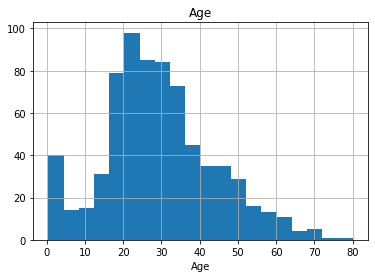

count    7.140000e+02
mean     2.388379e-16
std      1.000701e+00
min     -2.016979e+00
5%      -1.770360e+00
10%     -1.081480e+00
20%     -7.370406e-01
30%     -5.303766e-01
40%     -3.237127e-01
50%     -1.170488e-01
60%      1.447255e-01
70%      4.340550e-01
80%      7.784949e-01
90%      1.398487e+00
95%      1.811815e+00
99%      2.491739e+00
max      3.465126e+00
Name: Age_standart_scaler, dtype: float64


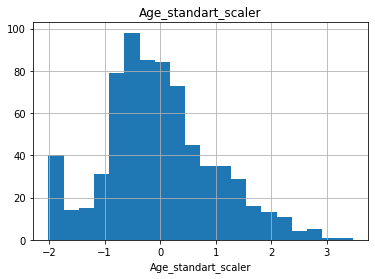

count    714.000000
mean       0.095056
std        0.812671
min       -1.542937
5%        -1.342657
10%       -0.783217
20%       -0.503497
30%       -0.335664
40%       -0.167832
50%        0.000000
60%        0.212587
70%        0.447552
80%        0.727273
90%        1.230769
95%        1.566434
99%        2.118601
max        2.909091
Name: Age_robust_scaler, dtype: float64


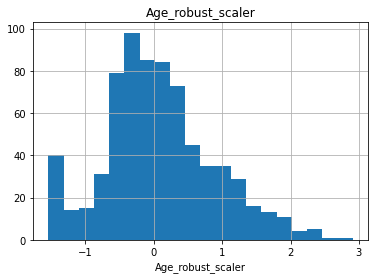

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
5%         0.044986
10%        0.170646
20%        0.233476
30%        0.271174
40%        0.308872
50%        0.346569
60%        0.394320
70%        0.447097
80%        0.509927
90%        0.623021
95%        0.698417
99%        0.822443
max        1.000000
Name: Age_min_max_scaler, dtype: float64


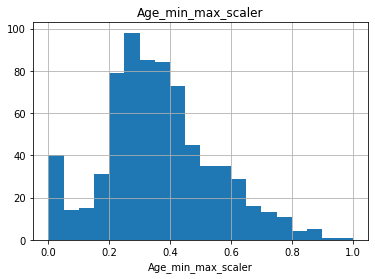

In [116]:
#Ortaya çıkan değişkenlerin yeni değerlerinde bir değişiklik var mı diye gözlemliyoruz.
#Dağılım hepsinde aynı fakat farklılık gösteren şey değişkenlerin değerlerinin ifade ediliş tarzıdır.
for col in age_cols:
  num_summary(df, col, plot = True)

#Numeric to Categorical: Sayısal Değişkenleri Kategorik Değişkenlere Çevirme
**Binning**

In [121]:
#Elimizdeki sayısal değişkenleri kategorileştirip, kategorileri isimlendiremediğimiz noktalarda qcut kullanarak sayısal değişkenleri kategorik değişkenlere çevirebiliriz.
df["Age_qcut"] = pd.qcut(df["Age"], 5) 

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaler,Age_robust_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
